## Clase 3

#### Regresion logistica

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
# Drop the rows with missing values
titanic.dropna(inplace=True)
titanic.head()# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
# Drop the rows with missing values
titanic.dropna(inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [3]:
titanic = titanic.drop(
    [
        'alive', 'who', 'adult_male',
        'embark_town', 'class', 'deck','embark_town',
        "embarked"
    ],
    axis=1
)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,alone
1,1,1,female,38.0,1,0,71.2833,False
3,1,1,female,35.0,1,0,53.1000,False
6,0,1,male,54.0,0,0,51.8625,True
10,1,3,female,4.0,1,1,16.7000,False
11,1,1,female,58.0,0,0,26.5500,True


In [4]:
# Convert categorical variables into dummy variables
titanic = pd.get_dummies(titanic, drop_first=True)
titanic.head()
titanic.shape

(182, 8)

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    titanic.drop('survived', axis=1),
    titanic['survived'],
    test_size=0.2, random_state=0
)

In [6]:
# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8648648648648649


<AxesSubplot:>

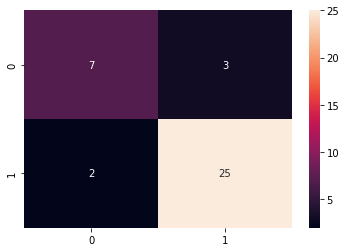

In [8]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)